In [30]:
pip install resampy

In [31]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
print(os.getcwd())

/content


In [33]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['test', 'train', 'val']


In [34]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
train
val


In [35]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [36]:
from pickle import dump
from pickle import load

In [37]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000004_0.wav',
 'a_00000002_5000.wav',
 'a_00000002_0.wav',
 'a_00000000_5000.wav',
 'a_00000000_0.wav',
 'a_00000014_5000.wav',
 'a_00000014_0.wav',
 'a_00000013_0.wav',
 'a_00000012_5000.wav',
 'a_00000010_5000.wav',
 'a_00000009_5000.wav',
 'a_00000009_0.wav',
 'a_00000008_0.wav',
 'a_00000007_5000.wav',
 'a_00000006_5000.wav',
 'a_00000006_0.wav',
 'a_00000005_5000.wav',
 'a_00000004_5000.wav',
 'a_00000023_0.wav',
 'a_00000022_5000.wav',
 'a_00000021_5000.wav',
 'a_00000021_0.wav',
 'a_00000020_5000.wav',
 'a_00000019_5000.wav',
 'a_00000018_0.wav',
 'a_00000017_0.wav',
 'a_00000016_5000.wav',
 'a_00000015_5000.wav',
 'a_00000015_0.wav',
 'a_00000038_5000.wav',
 'a_00000037_5000.wav',
 'a_00000037_0.wav',
 'a_00000036_5000.wav',
 'a_00000034_5000.wav',
 'a_00000034_0.wav',
 'a_00000033_5000.wav',
 'a_00000032_0.wav',
 'a_00000030_0.wav',
 'a_00000029_5000.wav',
 'a_00000026_0.wav',
 'a_00000029_0.wav',
 'a_00000025_0.wav',
 'a_00000024_5000.wav',
 'a_00000046_5000.wav',
 'a_

In [38]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000010_0.wav',
 'a_00000008_5000.wav',
 'a_00000007_0.wav',
 'a_00000003_0.wav',
 'a_00000001_0.wav',
 'a_00000028_5000.wav',
 'a_00000024_0.wav',
 'a_00000022_0.wav',
 'a_00000018_5000.wav',
 'a_00000016_0.wav',
 'a_00000013_5000.wav',
 'a_00000012_0.wav',
 'a_00000041_5000.wav',
 'a_00000036_0.wav',
 'a_00000035_5000.wav',
 'a_00000032_5000.wav',
 'a_00000031_5000.wav',
 'a_00000031_0.wav',
 'a_00000082_0.wav',
 'a_00000079_0.wav',
 'a_00000074_5000.wav',
 'a_00000072_0.wav',
 'a_00000064_5000.wav',
 'a_00000063_0.wav',
 'a_00000062_0.wav',
 'a_00000058_0.wav',
 'a_00000053_0.wav',
 'a_00000047_5000.wav',
 'a_00000045_0.wav',
 'a_00000042_5000.wav',
 'a_00000123_5000.wav',
 'a_00000120_0.wav',
 'a_00000117_5000.wav',
 'a_00000116_0.wav',
 'a_00000115_5000.wav',
 'a_00000114_0.wav',
 'a_00000106_5000.wav',
 'a_00000104_5000.wav',
 'a_00000102_5000.wav',
 'a_00000100_5000.wav',
 'a_00000093_5000.wav',
 'a_00000096_5000.wav',
 'a_00000088_0.wav',
 'n_00000043_0.wav',
 'n_00000037_

In [39]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000001_5000.wav',
 'a_00000003_5000.wav',
 'a_00000005_0.wav',
 'a_00000023_5000.wav',
 'a_00000020_0.wav',
 'a_00000019_0.wav',
 'a_00000017_5000.wav',
 'a_00000011_5000.wav',
 'a_00000011_0.wav',
 'a_00000030_5000.wav',
 'a_00000028_0.wav',
 'a_00000027_5000.wav',
 'a_00000027_0.wav',
 'a_00000026_5000.wav',
 'a_00000025_5000.wav',
 'a_00000055_5000.wav',
 'a_00000053_5000.wav',
 'a_00000052_0.wav',
 'a_00000043_0.wav',
 'a_00000038_0.wav',
 'a_00000035_0.wav',
 'a_00000033_0.wav',
 'a_00000068_0.wav',
 'a_00000067_5000.wav',
 'a_00000066_0.wav',
 'a_00000065_0.wav',
 'a_00000057_5000.wav',
 'a_00000078_5000.wav',
 'a_00000077_0.wav',
 'a_00000076_0.wav',
 'a_00000075_0.wav',
 'a_00000074_0.wav',
 'a_00000073_0.wav',
 'a_00000094_5000.wav',
 'a_00000091_0.wav',
 'a_00000090_0.wav',
 'a_00000088_5000.wav',
 'a_00000087_0.wav',
 'a_00000085_5000.wav',
 'a_00000083_0.wav',
 'a_00000080_0.wav',
 'a_00000105_0.wav',
 'a_00000101_0.wav',
 'a_00000100_0.wav',
 'a_00000099_5000.wav',
 

In [40]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [41]:
normal_train

'/content/drive/MyDrive/DST/train/n_*.wav'

In [42]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [43]:
import librosa
import librosa.display

In [45]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [46]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [47]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [48]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [49]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [50]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [51]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [52]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [53]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

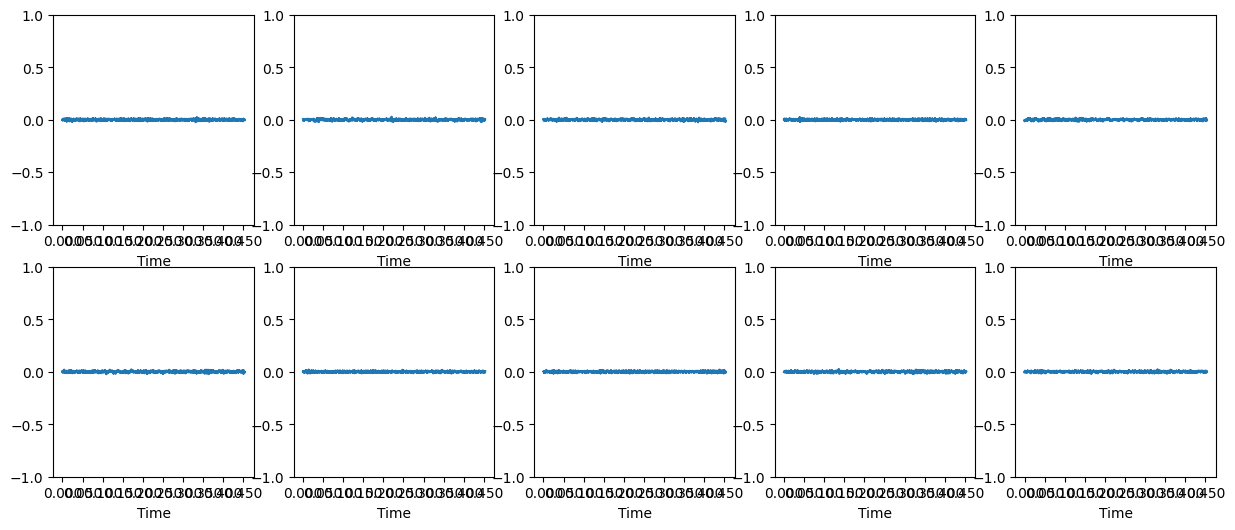

In [54]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

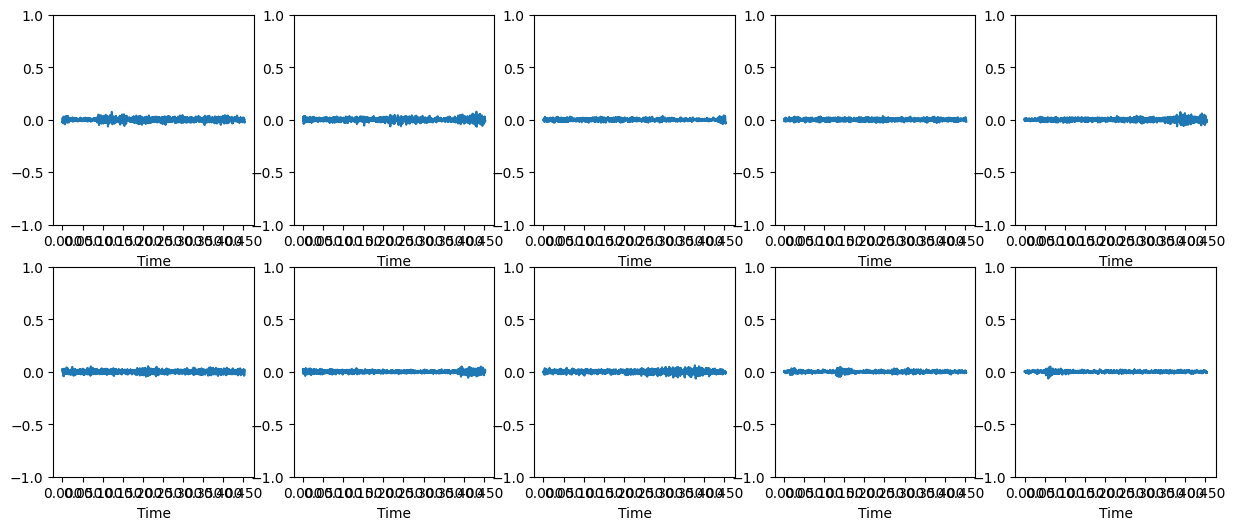

In [55]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [56]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [57]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [58]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [59]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [60]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.68750000e-02 1.94987706e+03]
[5.02929688e-02 1.78710320e+03]
[2.68554688e-02 1.66683563e+03]
[4.05273438e-02 1.78121231e+03]


Text(0, 0.5, 'Count')

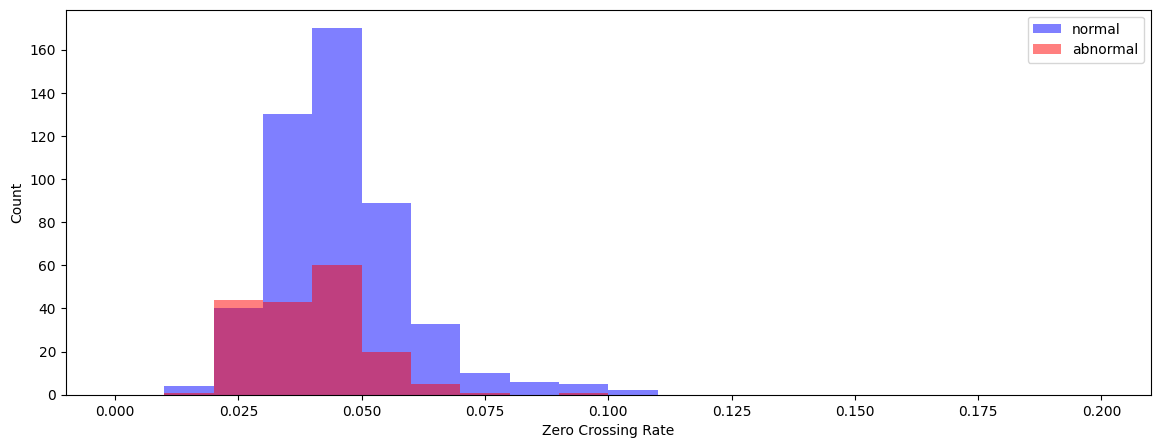

In [61]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

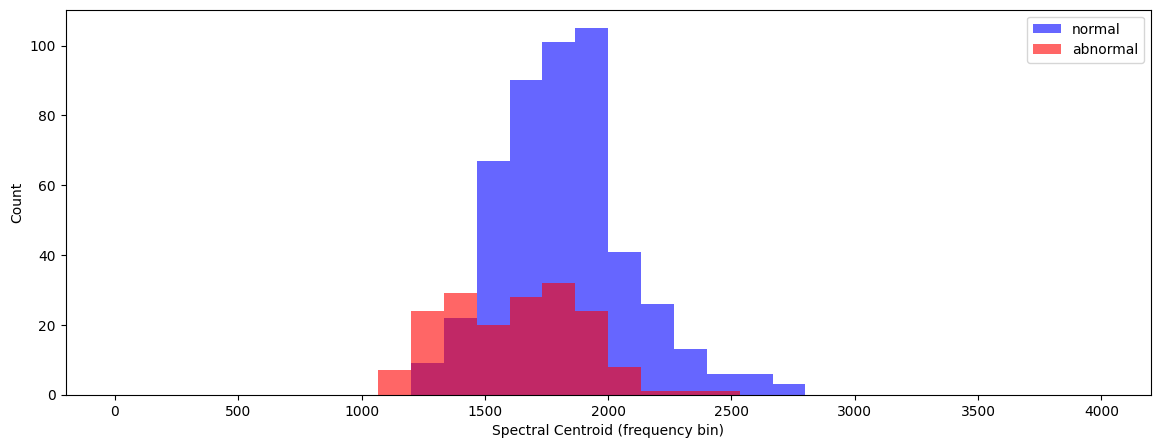

In [62]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [63]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [64]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [65]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [66]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

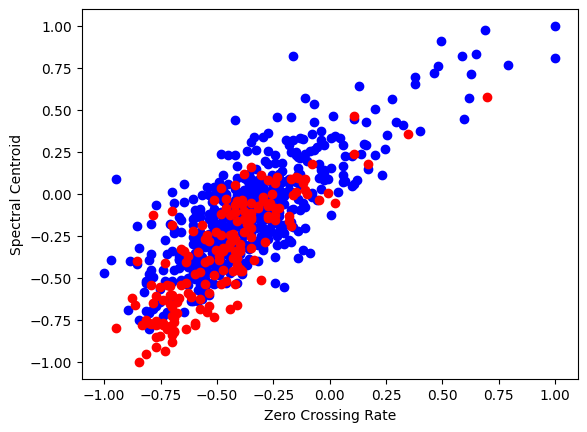

In [67]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [68]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [69]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [70]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [71]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [72]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [73]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [75]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [76]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4574 - loss: 0.6975 - val_accuracy: 0.4578 - val_loss: 0.6931
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6452 - loss: 0.6617 - val_accuracy: 0.7169 - val_loss: 0.6640
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7417 - loss: 0.6373 - val_accuracy: 0.7169 - val_loss: 0.6403
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7421 - loss: 0.6066 - val_accuracy: 0.7169 - val_loss: 0.6220
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7221 - loss: 0.6052 - val_accuracy: 0.7169 - val_loss: 0.6081
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7395 - loss: 0.5806 - val_accuracy: 0.7169 - val_loss: 0.5985
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7279 - loss: 0.5788 - val_accuracy: 0.7169 - val_loss: 0.5929
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7657 - loss: 0.5533 - val_accu

In [78]:
import plotly
import plotly.graph_objs as go

In [79]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [80]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [81]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [84]:
file_name = '/content/drive/MyDrive/DST/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


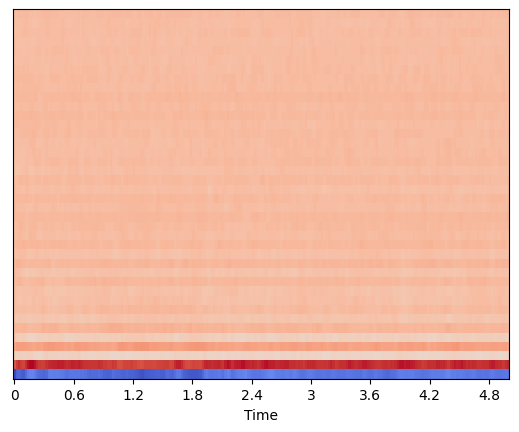

In [85]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [86]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [87]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [88]:
normal_train_features[0].shape

(40, 216)

In [89]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [90]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [91]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [92]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [93]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [94]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [95]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [96]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [97]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [98]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [99]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [100]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6010 - loss: 5.3239
Epoch 1: val_loss improved from inf to 0.49068, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 668ms/step - accuracy: 0.6008 - loss: 5.2475 - val_accuracy: 0.7590 - val_loss: 0.4907
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7390 - loss: 1.4004 
Epoch 2: val_loss did not improve from 0.49068
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7318 - loss: 1.2988 - val_accuracy: 0.8313 - val_loss: 0.5047
Epoch 3/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7799 - loss: 0.6140 
Epoch 3: val_loss did not improve from 0.49068
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7708 - loss: 0.6350 - val_accuracy: 0.8855 - val_loss: 0.5097
Epoch 4/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7157 - loss: 0.5569 
Epoch 4: val_loss improved from 0.49068 to 0.46694, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accurac

In [101]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [102]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [103]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [104]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1370, acc: 0.9684
Validation- loss: 0.1684, acc: 0.9518


In [105]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [106]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [  7  40]]


In [107]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9440    0.9916    0.9672       119
    abnormal     0.9756    0.8511    0.9091        47

    accuracy                         0.9518       166
   macro avg     0.9598    0.9213    0.9382       166
weighted avg     0.9529    0.9518    0.9508       166



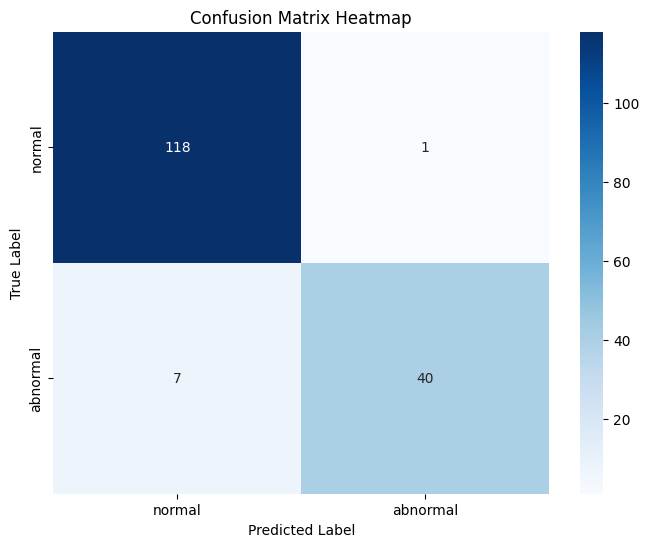

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [110]:
file_name = '/content/drive/MyDrive/DST/test/a_00000001_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


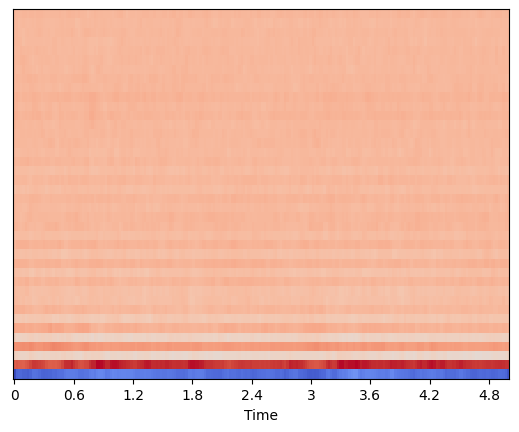

In [111]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [ ]:
#test

In [114]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

In [115]:
normal_test

'/content/drive/MyDrive/DST/test/n_*.wav'

In [116]:
import librosa
import librosa.display

In [117]:
import glob

normal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_test)
]

abnormal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_test)
]

In [118]:
print("Shape of normal_test_signals:", np.array(normal_test_signals, dtype=object).shape)
print("Shape of abnormal_test_signals:", np.array(abnormal_test_signals, dtype=object).shape)

Shape of normal_test_signals: (154, 110250)
Shape of abnormal_test_signals: (54, 110250)


In [119]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [120]:
datasetFile = 'coffee_test.pkl'
save_dataset([normal_test_signals, abnormal_test_signals], datasetFile)

Saved: coffee_test.pkl


In [121]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_test_signals, abnormal_test_signals] = load_dataset(datasetFile)

In [122]:
len(normal_test_signals), len(abnormal_test_signals)

(154, 54)

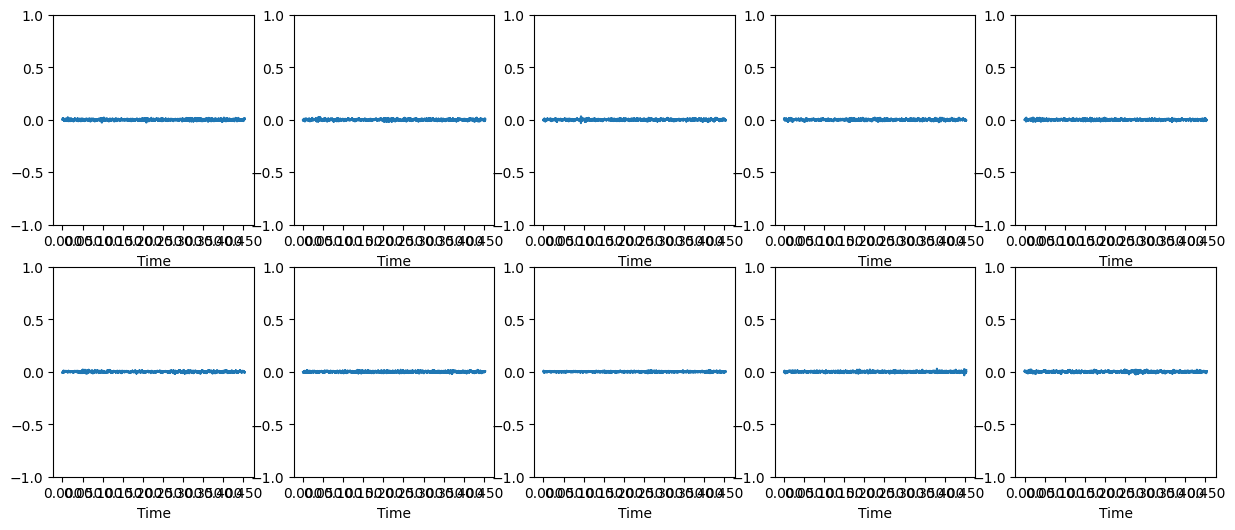

In [123]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

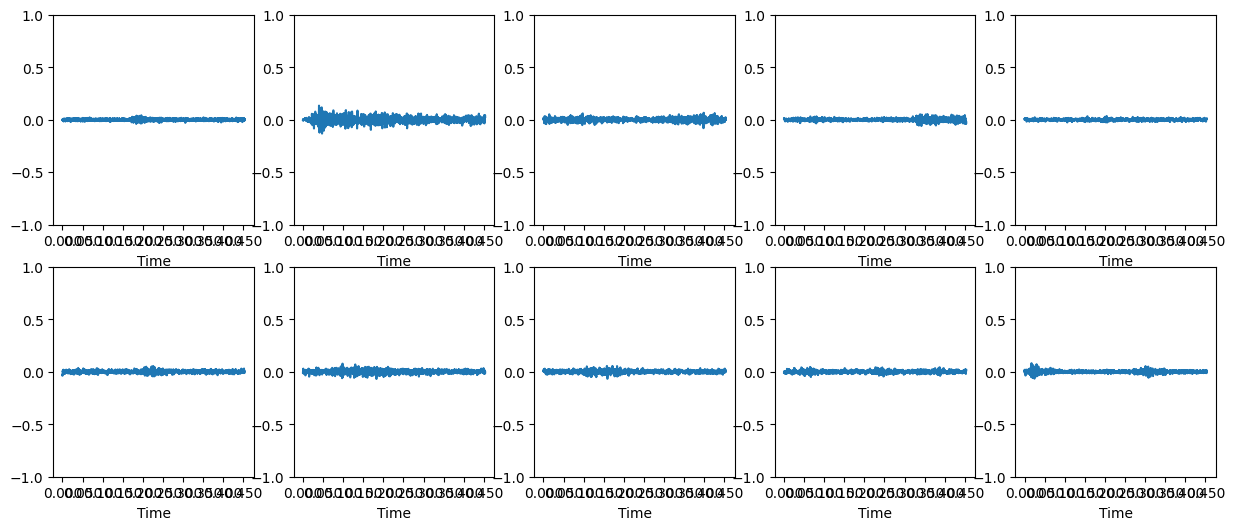

In [124]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [125]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [126]:
normal_test_features = np.array([extract_features(x) for x in normal_test_signals])
abnormal_test_features = np.array([extract_features(x) for x in abnormal_test_signals])

In [127]:
print(normal_test_features.shape)
print(abnormal_test_features.shape)

(154, 2)
(54, 2)


In [128]:
print(normal_test_features[10])
print(abnormal_test_features[10])

[3.36914062e-02 1.38954355e+03]
[5.22460938e-02 2.07766059e+03]


Text(0, 0.5, 'Count')

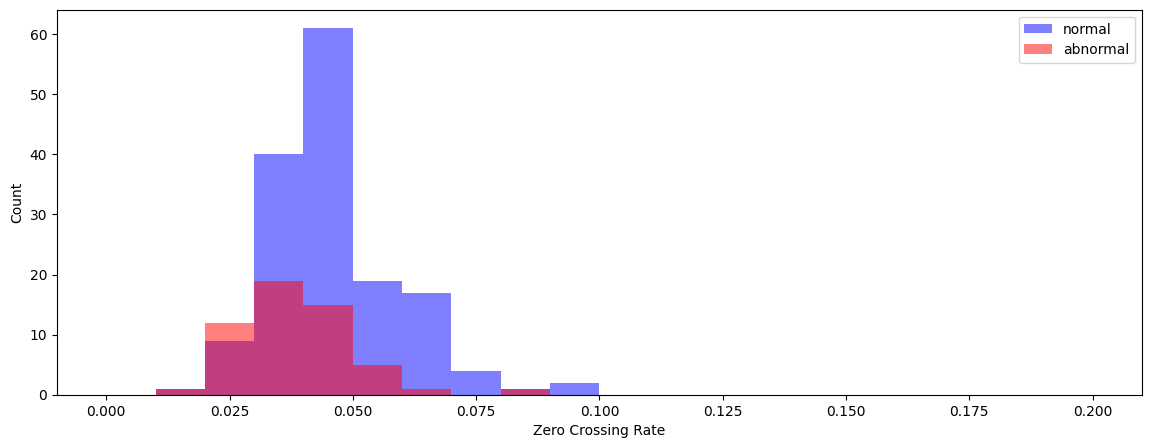

In [129]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_test_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

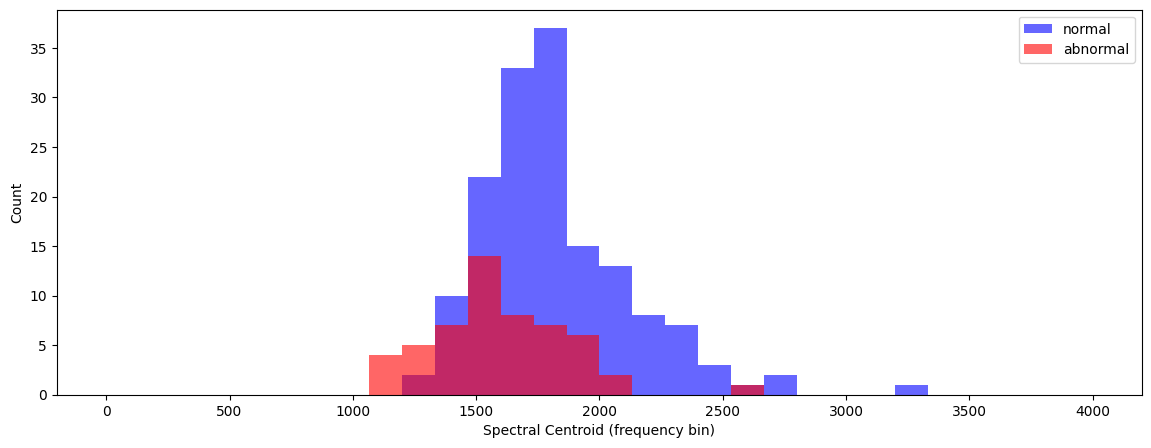

In [130]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_test_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [131]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 2)


In [143]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
test_features = scaler.fit_transform(feature_test_table)
print(test_features.min(axis=0))
print(test_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

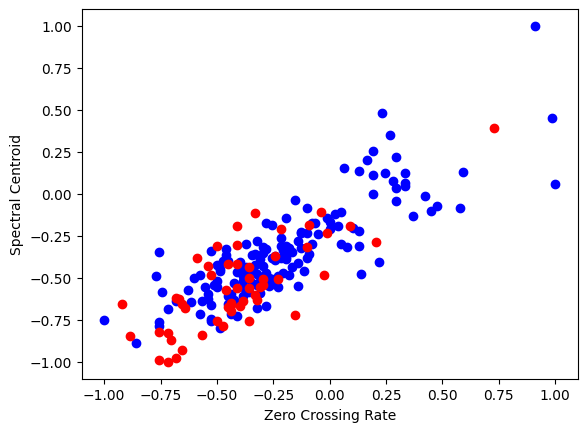

In [144]:
plt.scatter(test_features[:154,0], test_features[:154,1], c='b')
plt.scatter(test_features[154:,0], test_features[154:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [145]:
y_test_total = [0 for i in range(154)] + [1 for i in range(54)]

In [146]:
y_test_encoded = to_categorical(y_test_total)

In [147]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [148]:
x_test = test_features
y_test = y_test_encoded

In [149]:
x_test.shape, y_test.shape

((208, 2), (208, 2))

In [150]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [151]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [152]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [203]:
his2 = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_test, y_test)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9184 - loss: 0.2536 - val_accuracy: 0.9567 - val_loss: 0.1424
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9485 - loss: 0.1533 - val_accuracy: 0.9231 - val_loss: 0.2091
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9442 - loss: 0.1634 - val_accuracy: 0.9471 - val_loss: 0.1996
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9432 - loss: 0.1683 - val_accuracy: 0.8846 - val_loss: 0.2858
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8944 - loss: 0.2499 - val_accuracy: 0.9663 - val_loss: 0.1171
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8976 - loss: 0.2812 - val_accuracy: 0.9375 - val_loss: 0.1646
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9396 - loss: 0.1563 - val_accuracy: 0.9567 - val_loss: 0.1173
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9566 - loss: 0.1756 - val_accu

In [204]:
import plotly
import plotly.graph_objs as go

In [205]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="test_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [206]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="test_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [163]:
#CNN test

In [164]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [168]:
file_name = '/content/drive/MyDrive/DST/test/a_00000001_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


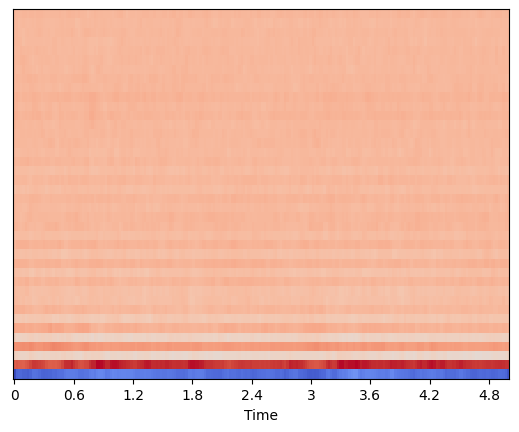

In [169]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [170]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [179]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [180]:
normal_test_features[0].shape

(40, 216)

In [181]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [182]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [183]:
x_test = feature_test_table
y_test = y_test_encoded

In [184]:
x_test.shape, y_test.shape

((208, 40, 216), (208, 2))

In [185]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [186]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [207]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [208]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='test_loss', verbose=1, save_best_only=True, mode='min')

In [209]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 590ms/step - accuracy: 0.9855 - loss: 0.0426 - val_accuracy: 0.9712 - val_loss: 0.0865
Epoch 2/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9924 - loss: 0.0340

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning:

Can save best model only with test_loss available.



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9927 - loss: 0.0330 - val_accuracy: 0.9663 - val_loss: 0.0613
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9884 - loss: 0.0220 - val_accuracy: 0.9712 - val_loss: 0.0544
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9843 - loss: 0.0277 - val_accuracy: 0.9663 - val_loss: 0.0624
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9712 - val_loss: 0.0633
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9890 - loss: 0.0231 - val_accuracy: 0.9615 - val_loss: 0.0785
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9966 - loss: 0.0140 - val_accuracy: 0.9760 - val_loss: 0.0599
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9925 - loss: 0.0176 - val_accuracy: 0.9663 - val_loss: 0.0709
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9892 - loss: 0.0315 - val_accuracy: 0.9712 - val_loss: 0.

In [210]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="test_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [211]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="test_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [191]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [192]:
test_res = model.evaluate(x_test, y_test, verbose=0, return_dict=True)


acc_key = next(k for k in test_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Test  - loss: {test_res['loss']:.4f}, acc: {test_res[acc_key]:.4f}")


Test  - loss: 0.1729, acc: 0.9327


In [195]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [196]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[154   0]
 [ 14  40]]


In [197]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9167    1.0000    0.9565       154
    abnormal     1.0000    0.7407    0.8511        54

    accuracy                         0.9327       208
   macro avg     0.9583    0.8704    0.9038       208
weighted avg     0.9383    0.9327    0.9291       208



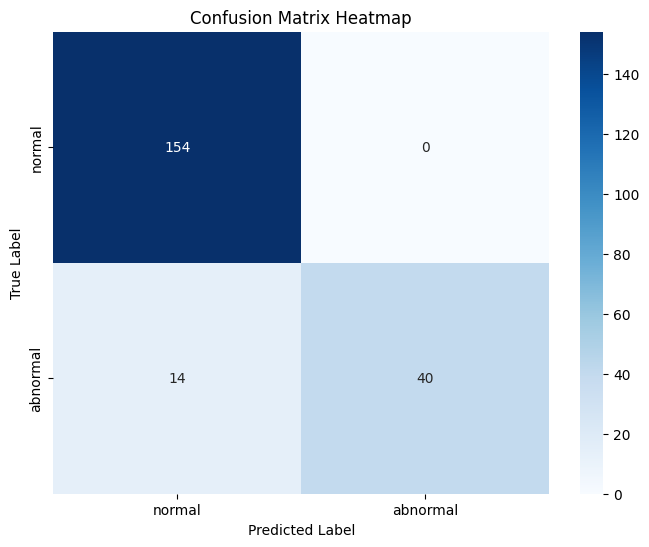

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()